In [1]:
# Install required libraries
!pip install yfinance timesfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of googleapis-common-protos to determine which version is compatible with other requirements. This could take a while.
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.2/440.2 kB 32.7 MB/s eta

In [1]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=3309881e8ee71f9044903231c6342d835e3697fb7a365b6ea4954bbd8ffe34c1
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
import os
import time
import timesfm
from collections import defaultdict
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


2024-09-04 09:12:11.022548: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia


In [3]:
# Load TimesFM model
timesfm_backend = "gpu"  # or 'cpu'
from jax._src import config
config.update("jax_platforms", {"cpu": "cpu", "gpu": "cuda", "tpu": ""}[timesfm_backend])

In [4]:
import yfinance as yf
import ta
import pandas as pd

# تنظیمات
ticker = 'AAPL'  # Example: Apple Inc.
start_date = "2022-10-12"
end_date = "2024-01-01"
analysis_start_date = "2023-01-03"  # تاریخ شروع مورد نظر

# دانلود داده‌های سهام از Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)
data = data.dropna()


# محاسبه میانگین‌های متحرک و اندیکاتورهای تکنیکال
data['moving_avg_10'] = data['Close'].rolling(window=10).mean()
data['moving_avg_50'] = data['Close'].rolling(window=50).mean()
data['rsi'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
data['ema'] = ta.trend.EMAIndicator(data['Close'], window=10).ema_indicator()

# حذف سطرهایی که دارای مقادیر NaN هستند (به دلیل محاسبات میانگین‌های متحرک)


# فیلتر کردن داده‌ها از تاریخ شروع مورد نظر
data = data[data.index >= analysis_start_date]

# تنظیم DataFrame نهایی
df = data[['Close', 'Volume', 'moving_avg_10', 'moving_avg_50', 'rsi', 'ema']].reset_index()
df.columns = ['date', 'close', 'volume', 'moving_avg_10', 'moving_avg_50', 'rsi', 'ema']
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# نمایش داده‌ها
df


[*********************100%***********************]  1 of 1 completed


,close,volume,moving_avg_10,moving_avg_50,rsi,ema
date,,,,,,
2023-01-03,125.070000,112117500,130.488998,142.709599,32.304320,130.829227
2023-01-04,126.360001,89113600,129.887999,142.291399,34.891363,130.016640
2023-01-05,125.019997,80962700,129.159998,141.802799,33.460886,129.108160
2023-01-06,129.619995,87754700,128.576998,141.348399,42.218538,129.201221
2023-01-09,130.149994,70790800,128.368998,140.964399,43.147003,129.373725
...,...,...,...,...,...,...
2023-12-22,193.600006,37122800,195.747002,185.398801,54.609714,194.957922
2023-12-26,193.050003,28919300,195.734003,185.682801,53.026883,194.611027
2023-12-27,193.149994,48087700,195.578001,185.971400,53.291938,194.345385


In [5]:


def get_batched_data_fn(batch_size: int = 32, context_len: int = 32, horizon_len: int = 1):
    examples = defaultdict(list)
    num_examples = 0
    for start in range(0, len(df) - (context_len + horizon_len), horizon_len):
        num_examples += 1
        context_end = start + context_len
        examples["inputs"].append(df["close"][start:context_end].tolist())
        examples["volume"].append(df["volume"][start:context_end].tolist() + [df["volume"].iloc[context_end - 1]])
        examples["moving_avg_10"].append(df["moving_avg_10"][start:context_end].tolist() + [df["moving_avg_10"].iloc[context_end - 1]])
        examples["moving_avg_50"].append(df["moving_avg_50"][start:context_end].tolist() + [df["moving_avg_50"].iloc[context_end - 1]])
        examples["rsi"].append(df["rsi"][start:context_end].tolist() + [df["rsi"].iloc[context_end - 1]])
        examples["ema"].append(df["ema"][start:context_end].tolist() + [df["ema"].iloc[context_end - 1]])
        examples["outputs"].append(df["close"][context_end:context_end + horizon_len].tolist())
        examples["dates"].append(df.index[start:context_end + horizon_len].tolist())  # Add dates to examples

    def data_fn():
        for i in range(1 + (num_examples - 1) // batch_size):
            yield {k: v[(i * batch_size): ((i + 1) * batch_size)] for k, v in examples.items()}

    return data_fn

In [6]:


# Define metrics
def mse(y_pred, y_true):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    return np.mean(np.square(y_pred - y_true), axis=1, keepdims=True)

def mae(y_pred, y_true):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    return np.mean(np.abs(y_pred - y_true), axis=1, keepdims=True)

In [7]:
import timesfm

context_len = 64
batch_size = 1  # ثابت نگه‌داشتن batch size
horizon_len = 1  # ثابت نگه‌داشتن horizon length



In [8]:

    model = timesfm.TimesFm(
        context_len=context_len,
        horizon_len=horizon_len,
        input_patch_len=32,
        output_patch_len=128,
        num_layers=20,
        model_dims=1280,
        backend="gpu",
    )
    model.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")

2024-09-04 09:12:51.860214: W external/xla/xla/service/gpu/nvptx_compiler.cc:718] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.6.68). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

checkpoint:   0%|          | 0.00/814M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.73k [00:00<?, ?B/s]

(…)oint_1100000/descriptor/descriptor.pbtxt:   0%|          | 0.00/499 [00:00<?, ?B/s]

(…)nts/checkpoint_1100000/metadata/metadata:   0%|          | 0.00/43.9k [00:00<?, ?B/s]

Constructing model weights.


Constructed model weights in 3.56 seconds.
Restoring checkpoint from /root/.cache/huggingface/hub/models--google--timesfm-1.0-200m/snapshots/8775f7531211ac864b739fe776b0b255c277e2be/checkpoints.


ERROR:absl:For checkpoint version > 1.0, we require users to provide
          `train_state_unpadded_shape_dtype_struct` during checkpoint
          saving/restoring, to avoid potential silent bugs when loading
          checkpoints to incompatible unpadded shapes of TrainState.


Restored checkpoint in 1.37 seconds.
Jitting decoding.
Jitted decoding in 24.02 seconds.


In [9]:
import os
import time
from collections import defaultdict
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import timesfm
import ta
from itertools import combinations
import gc
import json



features = ["volume", "moving_avg_10", "moving_avg_50", "rsi", "ema"]
feature_combinations = []
for r in range(1, len(features) + 1):
    feature_combinations.extend(combinations(features, r))
results_by_cov = []

for combo in feature_combinations:
    print(f"Processing combo: {combo}")
    input_data = get_batched_data_fn(batch_size=batch_size, context_len=context_len, horizon_len=1)
    metrics = defaultdict(list)


    # Process in smaller sub-batches
    for i, example in enumerate(input_data()):
        dynamic_numerical_covariates = {feature: example[feature] for feature in combo}
        raw_forecast, _ = model.forecast(
                            inputs=example["inputs"], freq=[0] * len(example["inputs"])
                        )
        cov_forecast, ols_forecast = model.forecast_with_covariates(
           inputs=example["inputs"],
           dynamic_numerical_covariates=dynamic_numerical_covariates,
           dynamic_categorical_covariates={},
           static_numerical_covariates={},
           static_categorical_covariates={},
           freq=[0] * len(example["inputs"]),
           normalize_xreg_target_per_input=True,
           xreg_mode="timesfm + xreg",)


        for j in range(len(example["inputs"])):
            result = {
                'input_index': j,
                'train_start_date': str(example["dates"][j][0]),
                'train_end_date': str(example["dates"][j][-2]),
                'predict_date': str(example["dates"][j][-1]),
                'raw_forecast': raw_forecast[j][0],
                'y_predict' : cov_forecast[j][0],
                'y_actual': example["outputs"][j][0],
                'batch_size': batch_size,
                'context_len': context_len,
                "timesfm + xreg":"timesfm + xreg",
                'combo' : combo,

            }
            results_by_cov.append(result)


Processing combo: ('volume',)
Processing combo: ('moving_avg_10',)
Processing combo: ('moving_avg_50',)
Processing combo: ('rsi',)
Processing combo: ('ema',)
Processing combo: ('volume', 'moving_avg_10')
Processing combo: ('volume', 'moving_avg_50')
Processing combo: ('volume', 'rsi')
Processing combo: ('volume', 'ema')
Processing combo: ('moving_avg_10', 'moving_avg_50')
Processing combo: ('moving_avg_10', 'rsi')
Processing combo: ('moving_avg_10', 'ema')
Processing combo: ('moving_avg_50', 'rsi')
Processing combo: ('moving_avg_50', 'ema')
Processing combo: ('rsi', 'ema')
Processing combo: ('volume', 'moving_avg_10', 'moving_avg_50')
Processing combo: ('volume', 'moving_avg_10', 'rsi')
Processing combo: ('volume', 'moving_avg_10', 'ema')
Processing combo: ('volume', 'moving_avg_50', 'rsi')
Processing combo: ('volume', 'moving_avg_50', 'ema')
Processing combo: ('volume', 'rsi', 'ema')
Processing combo: ('moving_avg_10', 'moving_avg_50', 'rsi')
Processing combo: ('moving_avg_10', 'movin

In [33]:
 results_df = pd.DataFrame(results_by_cov)
 results_df

,input_index,train_start_date,train_end_date,predict_date,raw_forecast,y_predict,y_actual,batch_size,context_len,timesfm + xreg,combo
0,0,2023-01-03 00:00:00,2023-04-04 00:00:00,2023-04-05 00:00:00,166.959579,174.092316,163.759995,1,64,timesfm + xreg,"(volume,)"
1,0,2023-01-04 00:00:00,2023-04-05 00:00:00,2023-04-06 00:00:00,165.057465,175.042053,164.660004,1,64,timesfm + xreg,"(volume,)"
2,0,2023-01-05 00:00:00,2023-04-06 00:00:00,2023-04-10 00:00:00,165.524918,181.442673,162.029999,1,64,timesfm + xreg,"(volume,)"
3,0,2023-01-06 00:00:00,2023-04-10 00:00:00,2023-04-11 00:00:00,162.622696,177.749969,160.800003,1,64,timesfm + xreg,"(volume,)"
4,0,2023-01-09 00:00:00,2023-04-11 00:00:00,2023-04-12 00:00:00,161.525681,175.524048,160.100006,1,64,timesfm + xreg,"(volume,)"
...,...,...,...,...,...,...,...,...,...,...,...
5730,0,2023-09-21 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,195.240768,215.340591,194.679993,1,64,timesfm + xreg,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"
5731,0,2023-09-22 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,194.696442,214.853348,193.600006,1,64,timesfm + xreg,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"
5732,0,2023-09-25 00:00:00,2023-12-22 00:00:00,2023-12-26 00:00:00,194.012909,211.681259,193.050003,1,64,timesfm + xreg,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"
5733,0,2023-09-26 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,193.501068,209.453766,193.149994,1,64,timesfm + xreg,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"


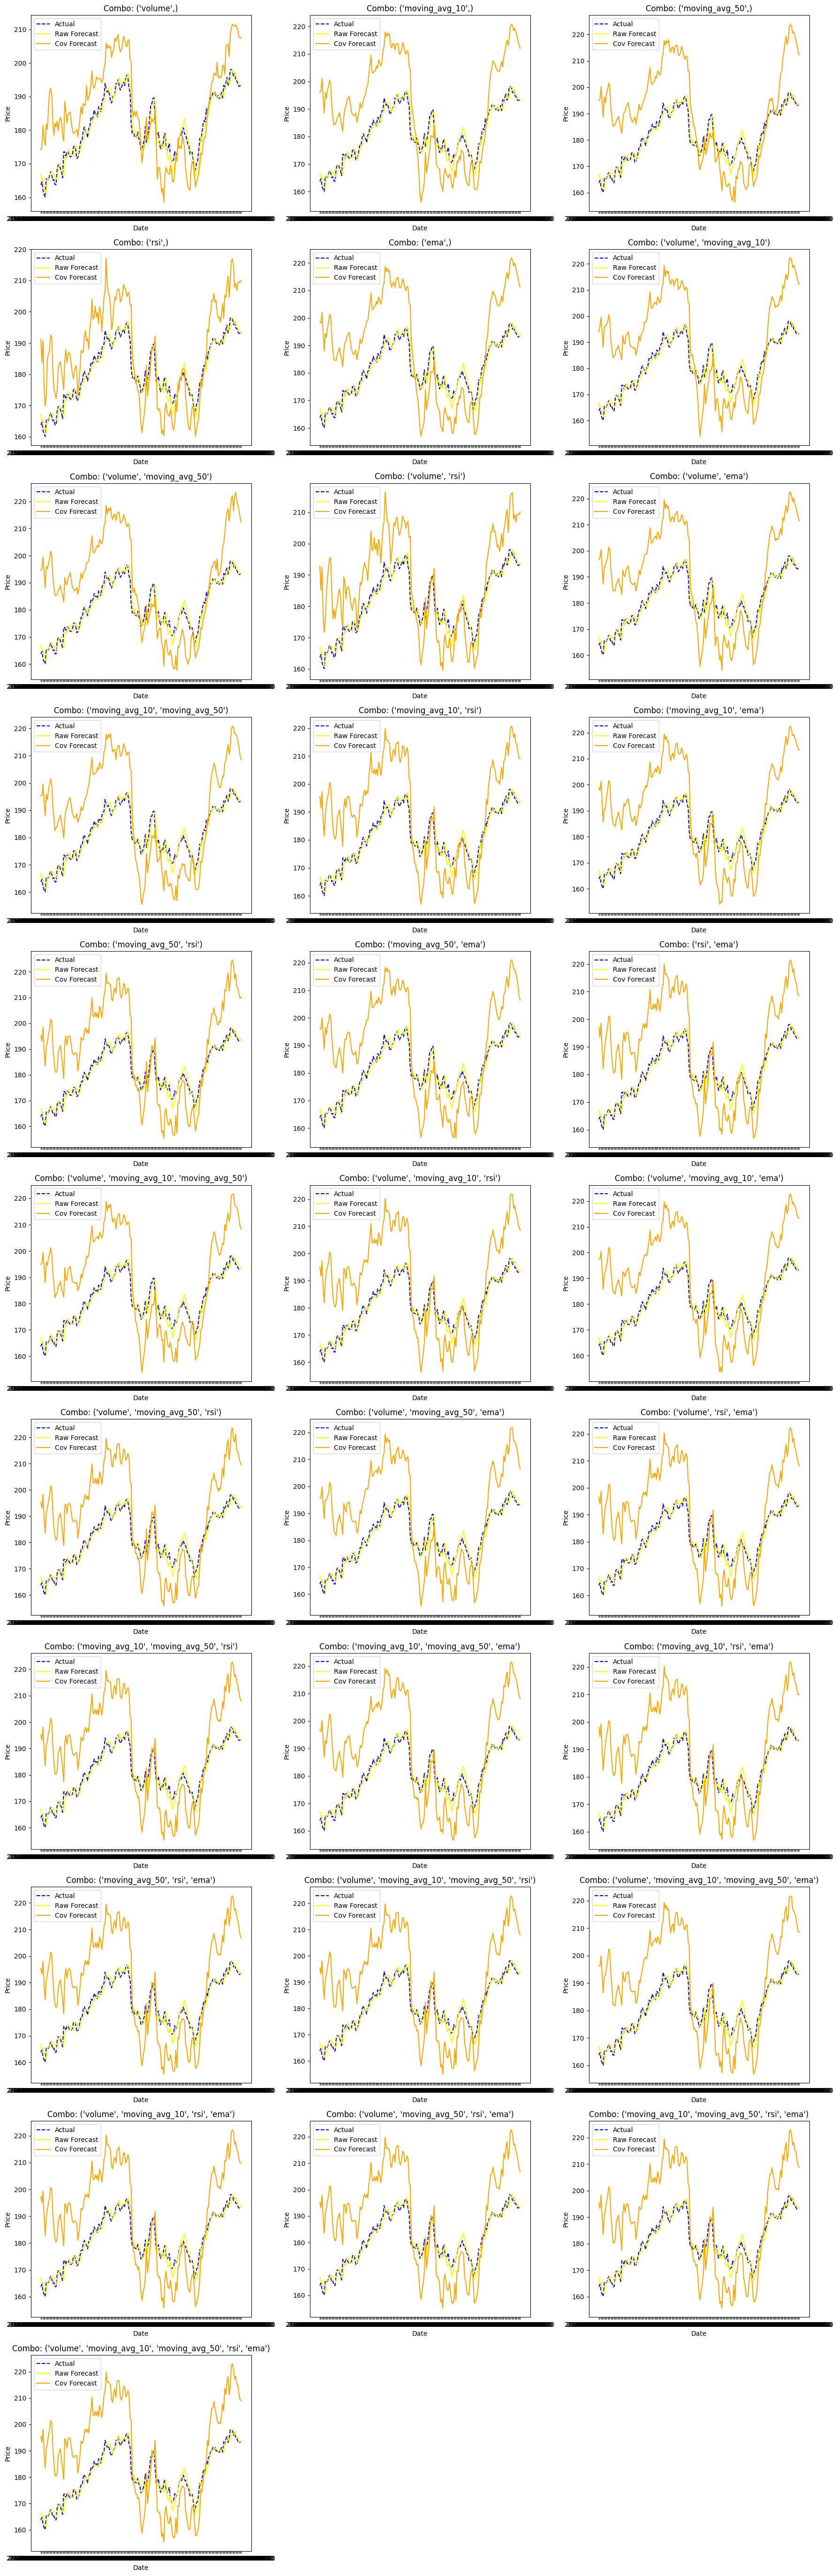

In [34]:
import math

# تعداد سطرها و ستون‌ها برای نمودارها
num_columns = 3
num_combos = len(feature_combinations)
num_rows = math.ceil(num_combos / num_columns)

# ایجاد نمودارهای چندگانه
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 5 * num_rows))

# تبدیل axes به یک لیست مسطح برای دسترسی آسان
axes = axes.flatten()

for idx, combo in enumerate(feature_combinations):
    combo_results = results_df[results_df['combo'] == combo]

    axes[idx].plot(combo_results['predict_date'], combo_results['y_actual'], label='Actual', color='blue', linestyle='--')
    axes[idx].plot(combo_results['predict_date'], combo_results['raw_forecast'], label='Raw Forecast', color='yellow')
    axes[idx].plot(combo_results['predict_date'], combo_results['y_predict'], label='Cov Forecast', color='orange')

    axes[idx].set_title(f'Combo: {combo}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Price')
    axes[idx].legend()

# حذف هر subplot خالی
for ax in axes[num_combos:]:
    fig.delaxes(ax)

# تنظیم فاصله بین نمودارها
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score

# توابع محاسبه متریک‌ها
def calculate_mse(context_results_df_actual, context_results_df_predicted):
    return mean_squared_error(context_results_df_actual, context_results_df_predicted)

def calculate_accuracy(context_results_df_actual, context_results_df_predicted):
    correct_predictions = 0
    total_predictions = 0
    for i in range(1, len(context_results_df_actual)):
        actual_today = context_results_df_actual.iloc[i]
        predicted_today = context_results_df_predicted.iloc[i]
        actual_yesterday = context_results_df_actual.iloc[i - 1]
        actual_movement = actual_today - actual_yesterday
        predicted_movement = predicted_today - actual_yesterday
        if (actual_movement > 0 and predicted_movement > 0) or (actual_movement < 0 and predicted_movement < 0):
            correct_predictions += 1
        total_predictions += 1

    return correct_predictions / total_predictions if total_predictions > 0 else 0

def calculate_profit(context_results_df_actual, context_results_df_predicted, initial_capital=100):
    capital = initial_capital
    position = 0

    for i in range(1, len(context_results_df_actual)):
        today_price = context_results_df_actual.iloc[i]
        yesterday_price = context_results_df_actual.iloc[i - 1]
        predicted_today_price = context_results_df_predicted.iloc[i]

        if predicted_today_price > yesterday_price:
            if position == 0:
                position = capital / yesterday_price
                capital = 0
        elif predicted_today_price < yesterday_price:
            if position > 0:
                capital = position * yesterday_price
                position = 0

    if position > 0:
        capital = position * context_results_df_actual.iloc[-1]

    return capital - initial_capital

def calculate_actual_direction_accuracy(context_results_df_actual, context_results_df_predicted):
    def get_direction(current_price, next_price):
        return 1 if next_price > current_price else 0

    real_directions = []
    predicted_directions = []

    for i in range(1, len(context_results_df_actual)):
        real_directions.append(get_direction(context_results_df_actual.iloc[i - 1], context_results_df_actual.iloc[i]))
        predicted_directions.append(get_direction(context_results_df_actual.iloc[i - 1], context_results_df_predicted.iloc[i]))

    return accuracy_score(real_directions, predicted_directions)

def calculate_direction_accuracy(context_results_df_actual, context_results_df_predicted):
    def get_direction(current_price, next_price):
        return 1 if next_price > current_price else 0

    real_directions = []
    predicted_directions = []

    for i in range(1, len(context_results_df_actual)):
        real_directions.append(get_direction(context_results_df_actual.iloc[i - 1], context_results_df_actual.iloc[i]))
        predicted_directions.append(get_direction(context_results_df_predicted.iloc[i - 1], context_results_df_predicted.iloc[i]))

    return accuracy_score(real_directions, predicted_directions)

def calculate_direction_profit(context_results_df_actual, context_results_df_predicted, initial_capital=100):
    capital = initial_capital
    position = 0

    for i in range(2, len(context_results_df_actual)):
        yesterday_price = context_results_df_actual.iloc[i - 1]
        yesterday_predicted_today_price = context_results_df_predicted.iloc[i - 1]
        predicted_today_price = context_results_df_predicted.iloc[i]

        if predicted_today_price > yesterday_predicted_today_price:
            if position == 0:
                position = capital / yesterday_price
                capital = 0
        elif predicted_today_price < yesterday_predicted_today_price:
            if position > 0:
                capital = position * yesterday_price
                position = 0

    if position > 0:
        capital = position * context_results_df_actual.iloc[-1]

    return capital - initial_capital

def calculate_results_for_combo(combo, context_results_df_actual, context_results_df_predicted):
    # محاسبه مقادیر متریک‌ها
    mse_value = calculate_mse(context_results_df_actual, context_results_df_predicted)
    accuracy_value = calculate_accuracy(context_results_df_actual, context_results_df_predicted)
    profit = calculate_profit(context_results_df_actual, context_results_df_predicted)
    direction_accuracy = calculate_direction_accuracy(context_results_df_actual, context_results_df_predicted)
    actual_direction_accuracy = calculate_actual_direction_accuracy(context_results_df_actual, context_results_df_predicted)
    direction_profit = calculate_direction_profit(context_results_df_actual, context_results_df_predicted)

    # ساخت دیکشنری از نتایج محاسبه شده
    result = {
        'combo': combo,
        'mse': mse_value,
        'accuracy': accuracy_value,
        'direction_accuracy': direction_accuracy,
        'actual_direction_accuracy': actual_direction_accuracy,
        'direction_profit': direction_profit,
        'profit': profit
    }

    return pd.DataFrame([result])

# حالا نتایج را برای هر combo حساب می‌کنیم
final_results = []

for combo in results_df['combo'].unique():
    combo_data_actual = results_df[results_df['combo'] == combo]['y_actual']
    combo_data_predicted = results_df[results_df['combo'] == combo]['y_predict']

    combo_results_df = calculate_results_for_combo(combo, combo_data_actual, combo_data_predicted)
    final_results.append(combo_results_df)

# ترکیب تمام نتایج در یک DataFrame
final_results_df = pd.concat(final_results).reset_index(drop=True)

# نمایش نتایج نهایی
print(final_results_df)


                                               combo         mse  accuracy  \
0                                          (volume,)  109.683253  0.478261   
1                                   (moving_avg_10,)  293.098329  0.467391   
2                                   (moving_avg_50,)  288.539212  0.461957   
3                                             (rsi,)  134.720092  0.494565   
4                                             (ema,)  308.695638  0.472826   
5                            (volume, moving_avg_10)  296.550577  0.467391   
6                            (volume, moving_avg_50)  282.804023  0.461957   
7                                      (volume, rsi)  145.275793  0.500000   
8                                      (volume, ema)  309.232333  0.472826   
9                     (moving_avg_10, moving_avg_50)  284.504947  0.483696   
10                              (moving_avg_10, rsi)  264.174084  0.489130   
11                              (moving_avg_10, ema)  303.653472

In [27]:

# پیدا کردن بهترین combo‌ها برای هر معیار
best_mse_combo = final_results_df.loc[final_results_df['mse'].idxmin()]
best_accuracy_combo = final_results_df.loc[final_results_df['accuracy'].idxmax()]
best_profit_combo = final_results_df.loc[final_results_df['profit'].idxmax()]
best_direction_accuracy_combo = final_results_df.loc[final_results_df['direction_accuracy'].idxmax()]
best_actual_direction_accuracy_combo = final_results_df.loc[final_results_df['actual_direction_accuracy'].idxmax()]
best_direction_profit_combo = final_results_df.loc[final_results_df['direction_profit'].idxmax()]

# نمایش بهترین ترکیب‌ها برای هر معیار
print("Best Combinations by Metric:")
print(f"Best MSE Combo: {best_mse_combo['combo']} with MSE: {best_mse_combo['mse']}")
print(f"Best Accuracy Combo: {best_accuracy_combo['combo']} with Accuracy: {best_accuracy_combo['accuracy']}")
print(f"Best Profit Combo: {best_profit_combo['combo']} with Profit: {best_profit_combo['profit']}")
print(f"Best Direction Accuracy Combo: {best_direction_accuracy_combo['combo']} with Direction Accuracy: {best_direction_accuracy_combo['direction_accuracy']}")
print(f"Best Actual Direction Accuracy Combo: {best_actual_direction_accuracy_combo['combo']} with Actual Direction Accuracy: {best_actual_direction_accuracy_combo['actual_direction_accuracy']}")
print(f"Best Direction Profit Combo: {best_direction_profit_combo['combo']} with Direction Profit: {best_direction_profit_combo['direction_profit']}")

Best Combinations by Metric:
Best MSE Combo: ('volume',) with MSE: 109.68325257213358
Best Accuracy Combo: ('volume', 'rsi') with Accuracy: 0.5
Best Profit Combo: ('volume', 'moving_avg_10', 'ema') with Profit: 17.439152367769765
Best Direction Accuracy Combo: ('volume',) with Direction Accuracy: 0.592391304347826
Best Actual Direction Accuracy Combo: ('volume', 'rsi') with Actual Direction Accuracy: 0.5
Best Direction Profit Combo: ('volume',) with Direction Profit: 28.843548980163632


In [28]:
# محاسبه‌ی متریک‌ها برای پیش‌بینی خام (Raw Forecast)
results_df=results_df[results_df['combo'] == combo]
y_actual = results_df['y_actual'].values
raw_forecast = results_df['raw_forecast'].values


# محاسبه متریک‌ها با استفاده از توابع از پیش تعریف شده
mse_value = calculate_mse(pd.Series(y_actual), pd.Series(raw_forecast))
accuracy_value = calculate_accuracy(pd.Series(y_actual), pd.Series(raw_forecast))
profit_value = calculate_profit(pd.Series(y_actual), pd.Series(raw_forecast))
direction_accuracy_value = calculate_direction_accuracy(pd.Series(y_actual), pd.Series(raw_forecast))
actual_direction_accuracy_value = calculate_actual_direction_accuracy(pd.Series(y_actual), pd.Series(raw_forecast))
direction_profit_value = calculate_direction_profit(pd.Series(y_actual), pd.Series(raw_forecast))

# نمایش نتایج محاسباتی
print(f"MSE: {mse_value}")
print(f"Accuracy: {accuracy_value}")
print(f"Profit: {profit_value}")
print(f"Direction Accuracy: {direction_accuracy_value}")
print(f"Actual Direction Accuracy: {actual_direction_accuracy_value}")
print(f"Direction Profit: {direction_profit_value}")


MSE: 5.4792340349909425
Accuracy: 0.45652173913043476
Profit: 6.971617016945885
Direction Accuracy: 0.5054347826086957
Actual Direction Accuracy: 0.45652173913043476
Direction Profit: 11.40749783184826


In [30]:
    initial_investment = 100
    initial_price = results_df['y_actual'].iloc[0]
    final_price = results_df['y_actual'].iloc[-1]

    # Calculate the number of shares bought initially
    shares_bought = initial_investment / initial_price

    # Calculate the final value of the investment
    final_investment_value = shares_bought * final_price

    # Calculate the total profit
    buy_and_hold_profit = final_investment_value - initial_investment
    buy_and_hold_profit

18.209580071141218